In [1]:
import awkward as ak
import numpy as np
import time
import coffea
import uproot
import hist
import vector
print("awkward version ", ak.__version__)
print("coffea version ", coffea.__version__)
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from collections import defaultdict
import pickle

awkward version  1.10.1
coffea version  0.7.19


In [2]:
#fff = uproot.open(infiles[0])

In [3]:
#fff["Events"]

In [4]:
#fff["Events"].keys()

In [5]:
#np.abs(pdgid.array()) == 11

In [6]:
#with open("qjetmass_zjets.pkl", "wb") as f:
#    pickle.dump( output, f )

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
from response_maker_nanov9_lib import *
from response_maker_nanov9 import main

In [9]:
#! mv qjetmass_zjets.pkl qjetmass_zjets_old.pkl

In [10]:
#! rm qjetmass_zjets.pkl

In [11]:
# If you want to rerun, use this. 
#main(testing=False)

In [12]:
with open("qjetmass_zjets.pkl", "rb") as f:
    output = pickle.load( f )

In [13]:
output.keys()

dict_keys(['njet_gen', 'njet_reco', 'ptjet_gen', 'ptjet_reco', 'ptjet_reco_over_gen', 'drjet_reco_gen', 'mz_gen', 'mz_reco', 'mz_reco_over_gen', 'dr_z_jet_gen', 'dr_z_jet_reco', 'dphi_z_jet_gen', 'dphi_z_jet_reco', 'ptasym_z_jet_gen', 'ptasym_z_jet_reco', 'm_u_jet_reco_over_gen', 'm_g_jet_reco_over_gen', 'dr_gen_subjet', 'response_matrix_u', 'response_matrix_g', 'cutflow'])

In [14]:
output["cutflow"]

{'UL18NanoAOD2500toInf': defaultdict(int,
             {'all events': 1978203,
              'weights cut': 1903318,
              'ee total': 2220895,
              'ee nlep >=2': 335542,
              'ee zpt > 90': 307762,
              'ee >=1 gen jet': 289842,
              'ee gen jet pt cut': 289842,
              'ee gen jet eta cut': 289842,
              'ee gen jet dphi cut': 276210,
              'ee gen jet asym cut': 20328,
              'ee gen jet cuts': 20328,
              'ee groomed gen jet cuts ': 20328,
              'ee >=1 reco jet': 17897,
              'ee reco jet cuts': 17897,
              'mm total': 2304797,
              'mm nlep >=2': 422544,
              'mm zpt > 90': 355932,
              'mm >=1 gen jet': 334911,
              'mm gen jet pt cut': 334911,
              'mm gen jet eta cut': 334911,
              'mm gen jet dphi cut': 317833,
              'mm gen jet asym cut': 21117,
              'mm gen jet cuts': 21117,
              'mm groom

In [15]:
datasets = list( output["cutflow"].keys() )

In [16]:
histnames = output.keys()

In [17]:
for ihist,ihistname in enumerate(histnames):
    if ihistname == "cutflow" : continue
    for i,dataset in enumerate(datasets) : 
        for j,lepname in enumerate( ["ee", "mm"]):
            output[ihistname].view(flow=True)[i][j] /= output["cutflow"][dataset][lepname + ' reco jet cuts']
            output[ihistname].variances(flow=True)[i][j] /= output["cutflow"][dataset][lepname + ' reco jet cuts']

In [18]:
import matplotlib.pyplot as plt

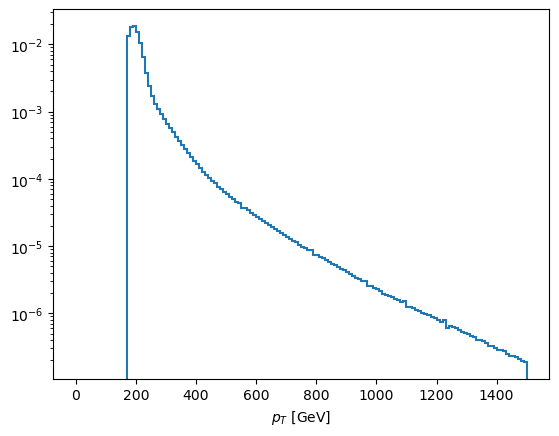

In [19]:
output['ptjet_reco'].project("pt").plot(density=True)
plt.yscale("log")
plt.show()

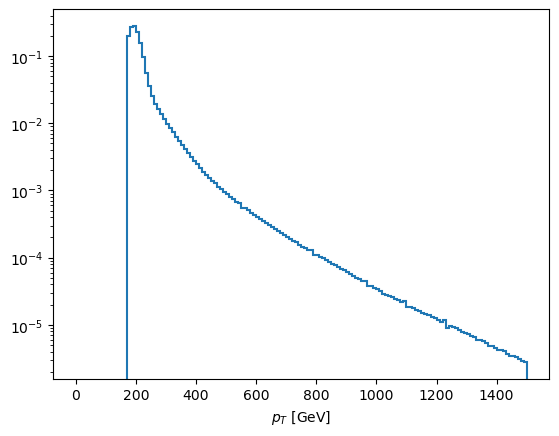

In [20]:
output['ptjet_reco'].project("pt").plot()
plt.yscale("log")

In [21]:
response_matrix_u_values = output['response_matrix_u'].project("ptreco", "mreco", "ptgen", "mgen").values()
response_matrix_g_values = output['response_matrix_g'].project("ptreco", "mreco", "ptgen", "mgen").values()

In [22]:
nptreco,nmassreco,nptgen,nmassgen = response_matrix_u_values.shape
response_matrix_u_final = response_matrix_u_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

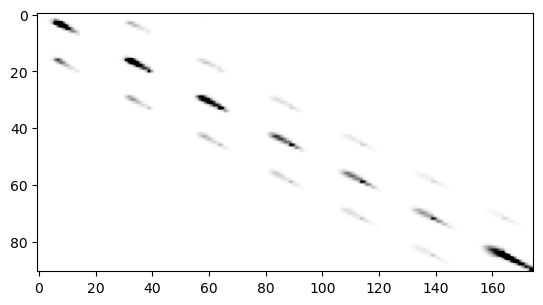

In [23]:
plt.imshow( np.log(response_matrix_u_final+1), vmax=0.2, aspect="equal", cmap="binary" )

In [24]:
response_matrix_g_final = response_matrix_g_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

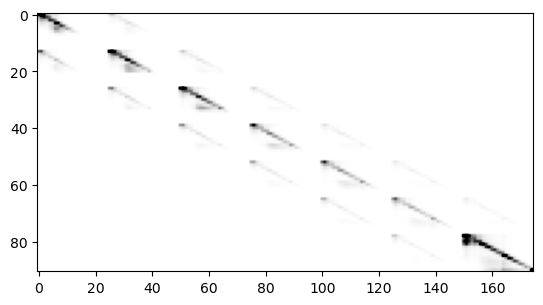

In [25]:
plt.imshow( np.log(response_matrix_g_final+1), vmax=0.2, aspect="equal", cmap="binary" )

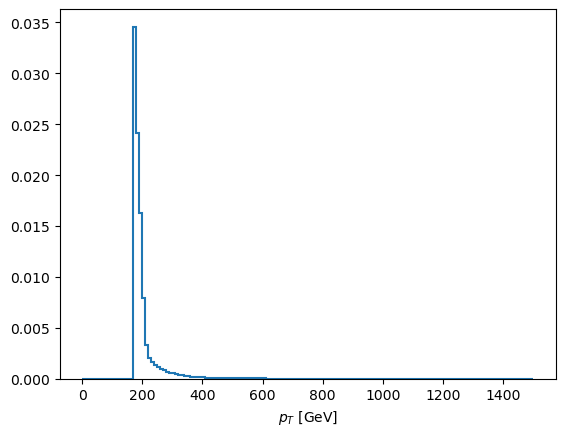

In [26]:
output['ptjet_gen'].project("pt").plot(density=True)
plt.show()

In [27]:
output['ptjet_gen'].sum().value

1.965559913550375

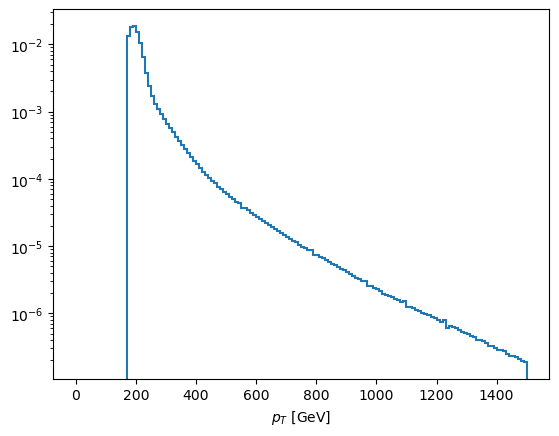

In [28]:
output['ptjet_reco'].project("pt").plot(density=True)
plt.yscale("log")
plt.show()

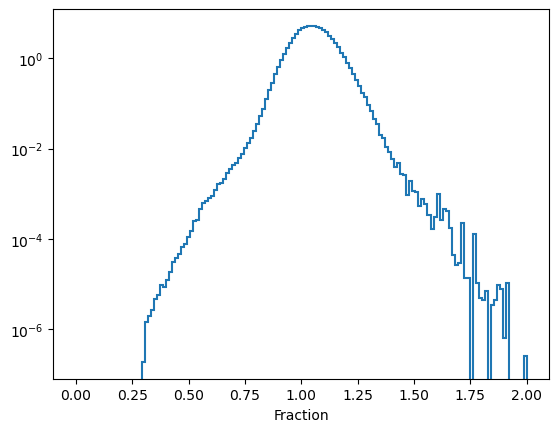

In [29]:
output['ptjet_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

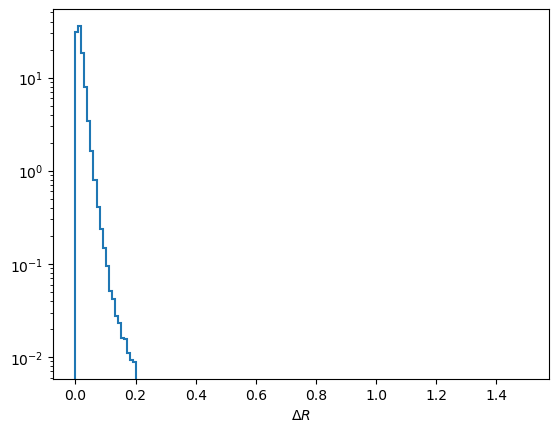

In [30]:
output['drjet_reco_gen'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

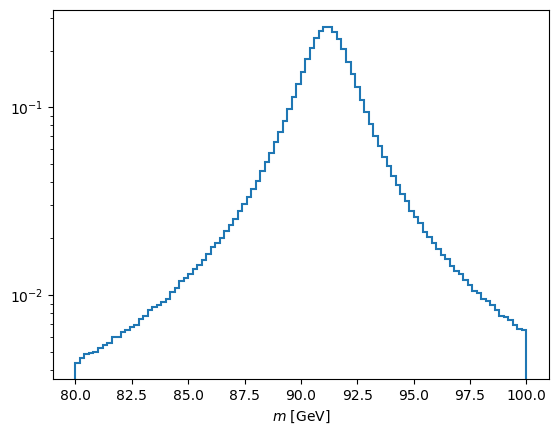

In [31]:
output['mz_gen'].project("mass").plot(density=True)
plt.yscale("log")
plt.show()

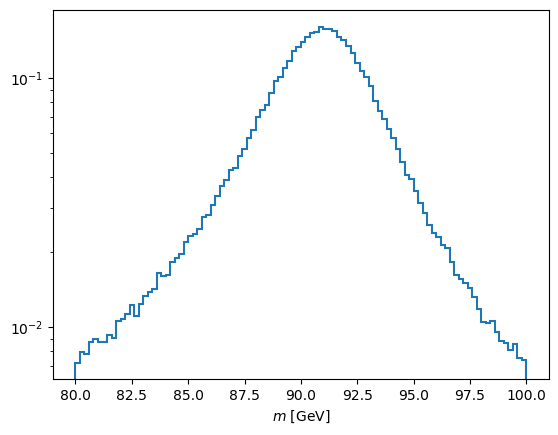

In [32]:
output['mz_reco'].project("mass").plot(density=True)
plt.yscale("log")
plt.show()

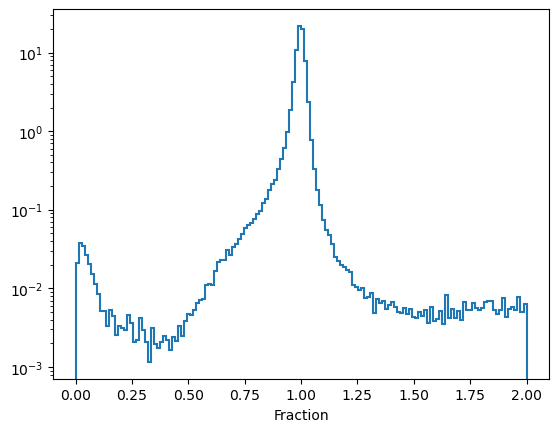

In [33]:
output['mz_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

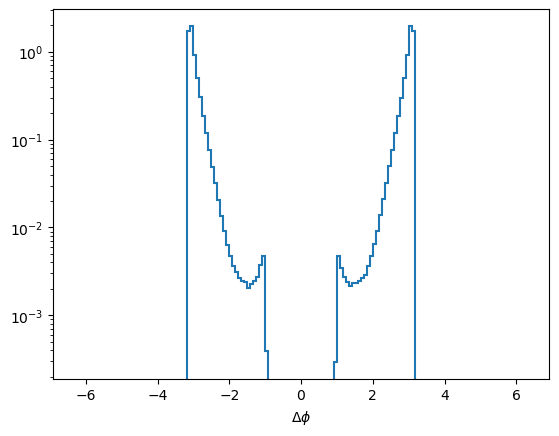

In [34]:
output['dphi_z_jet_gen'].project("dphi").plot(density=True)
plt.yscale("log")
plt.show()

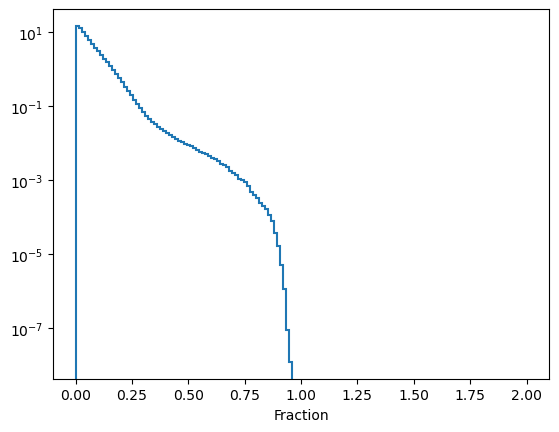

In [35]:
output['ptasym_z_jet_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

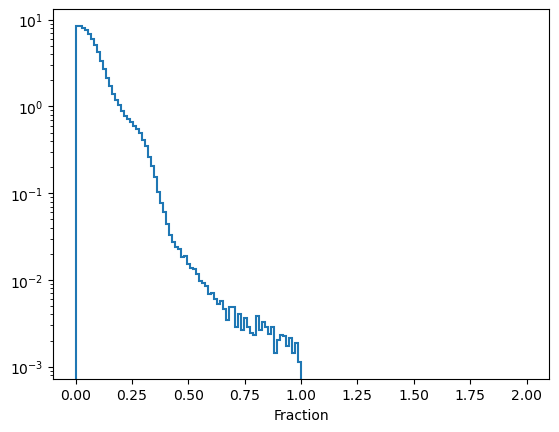

In [36]:
output['ptasym_z_jet_reco'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

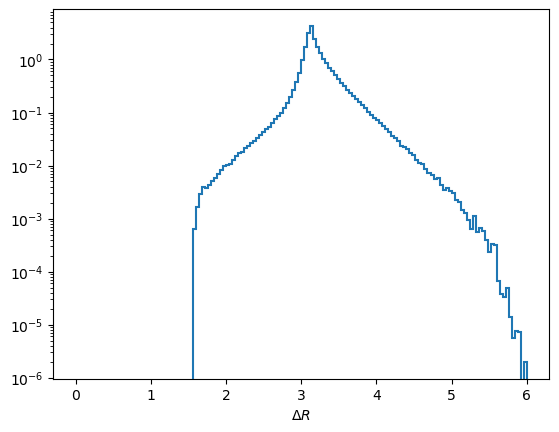

In [37]:
output['dr_z_jet_gen'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

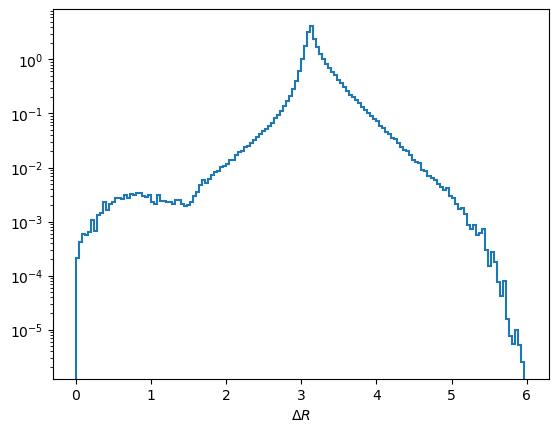

In [38]:
output['dr_z_jet_reco'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

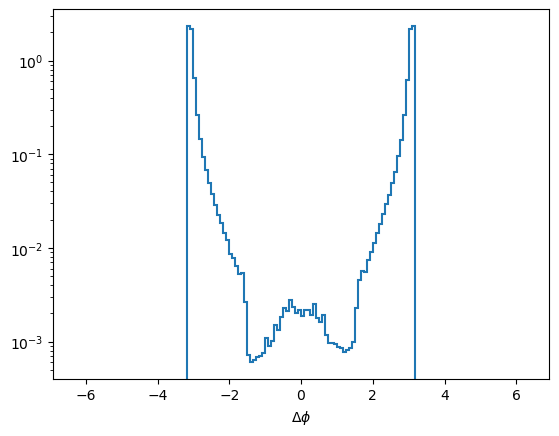

In [39]:
output['dphi_z_jet_reco'].project("dphi").plot(density=True)
plt.yscale("log")
plt.show()

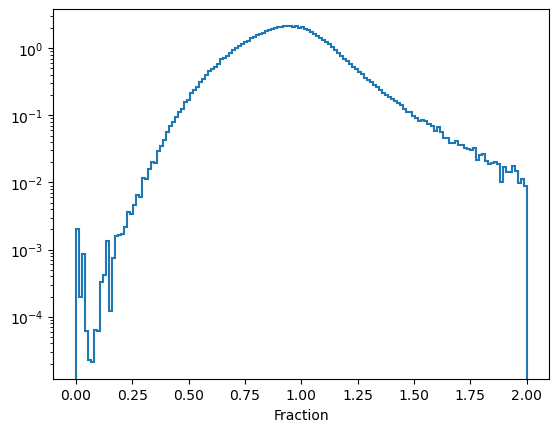

In [40]:
output['m_u_jet_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

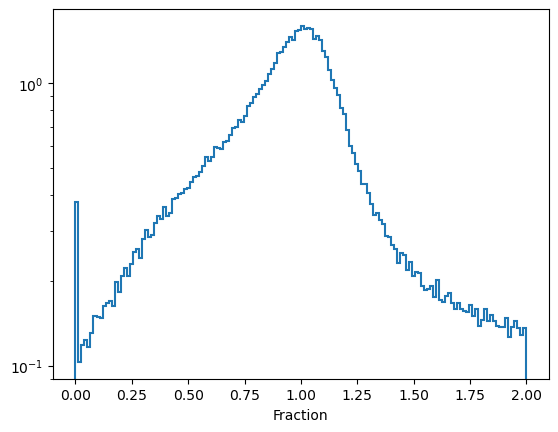

In [41]:
output['m_g_jet_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

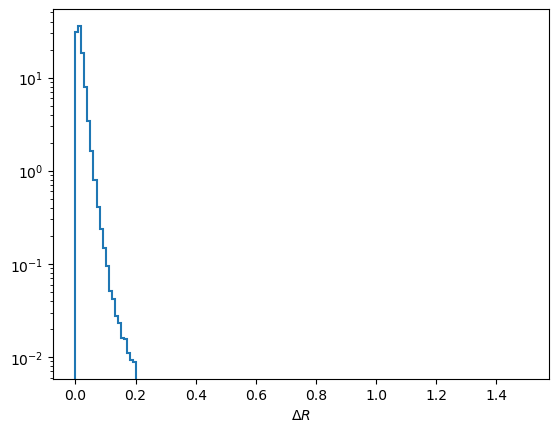

In [42]:
output['drjet_reco_gen'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

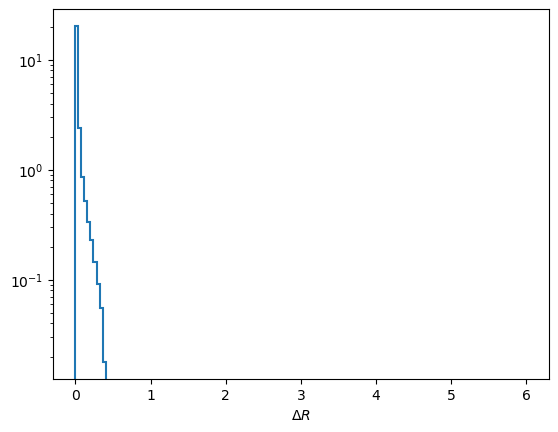

In [43]:
output['dr_gen_subjet'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()